In [6]:
import pandas as pd
import numpy as np
import random as rnd
from math import sqrt, log, cos, pi
import matplotlib.pyplot as plt
import seaborn as sns
rnd.seed(1)

# 1. Алгоритмы моделирования непрерывных случайных чисел с заданным законом распределения
## 2.2. Равномерное распределение (непрерывное)
### rnrm1 - метод Бокс-Миллера (метод точного преобразования),
### rnrm2 - метод, основанный на центральной предельной теореме

irnp  Теор. знач  Погрешность
rnrm1 @M@ -0.004387           0    -0.004387
      @D@  1.015890           1     0.015890
rnrm2 @M@  0.013629           0     0.013629
      @D@  1.002147           1     0.002147

<Axes: ylabel='Probability'>

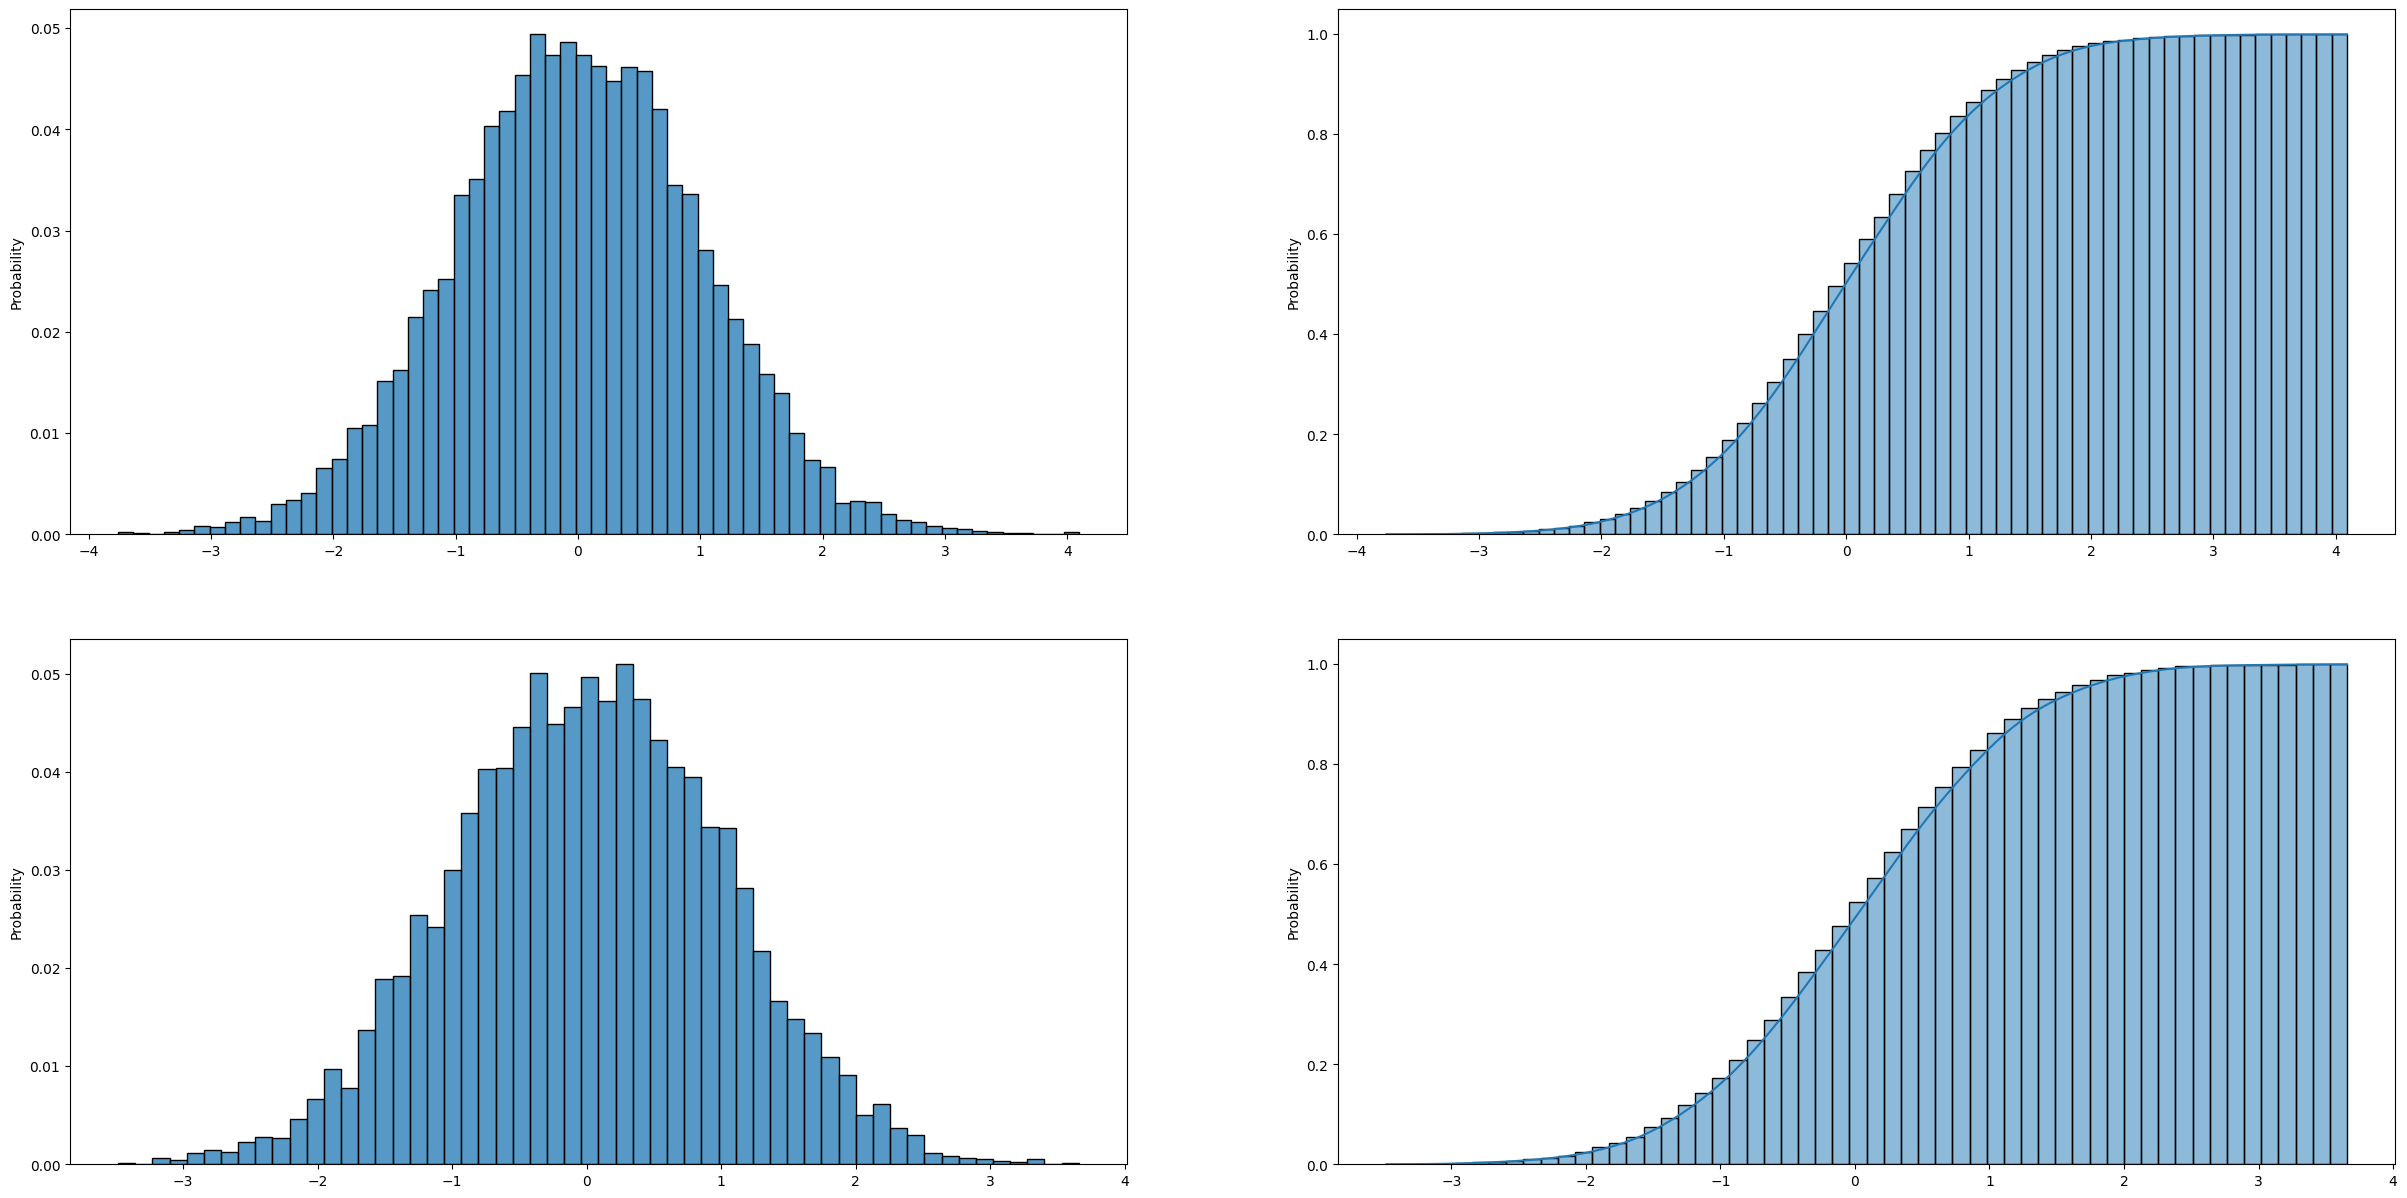

In [13]:
def rnrm1():
    u1 = rnd.random()
    u2 = rnd.random()
    return sqrt((-2) * log(u2)) * cos(2 * pi * u1)

def rnrm2():
    u = [rnd.random() for _ in range(12)]
    return sum(u) - 6

box_miller_series = np.array([rnrm1() for _ in range(10000)])
clt_series = np.array([rnrm2() for _ in range(10000)])
df = pd.DataFrame(index=pd.MultiIndex.from_product([['rnrm1', 'rnrm2'], ['@M@', '@D@']]))
df['irnp'] = [box_miller_series.mean(), box_miller_series.var(), clt_series.mean(), clt_series.var()]
df['Теор. знач'] = [0, 1, 0, 1]
df['Погрешность'] = df['irnp'] - df['Теор. знач']
display(df)
fig, ax = plt.subplots(2, 2, figsize=(30, 15))
sns.histplot(box_miller_series, ax=ax[0][0], stat="probability",)
sns.histplot(box_miller_series, ax=ax[0][1], kde=True, stat="probability", cumulative=True)
sns.histplot(clt_series, ax=ax[1][0], stat="probability")
sns.histplot(clt_series, ax=ax[1][1], kde=True, stat="probability", cumulative=True)

## 2.3 Экспоненциальное распределение

rnexp  Теор. знач  Погрешность
@M@  1.011145           1     0.011145
@D@  1.043393           1     0.043393

<Axes: ylabel='Probability'>

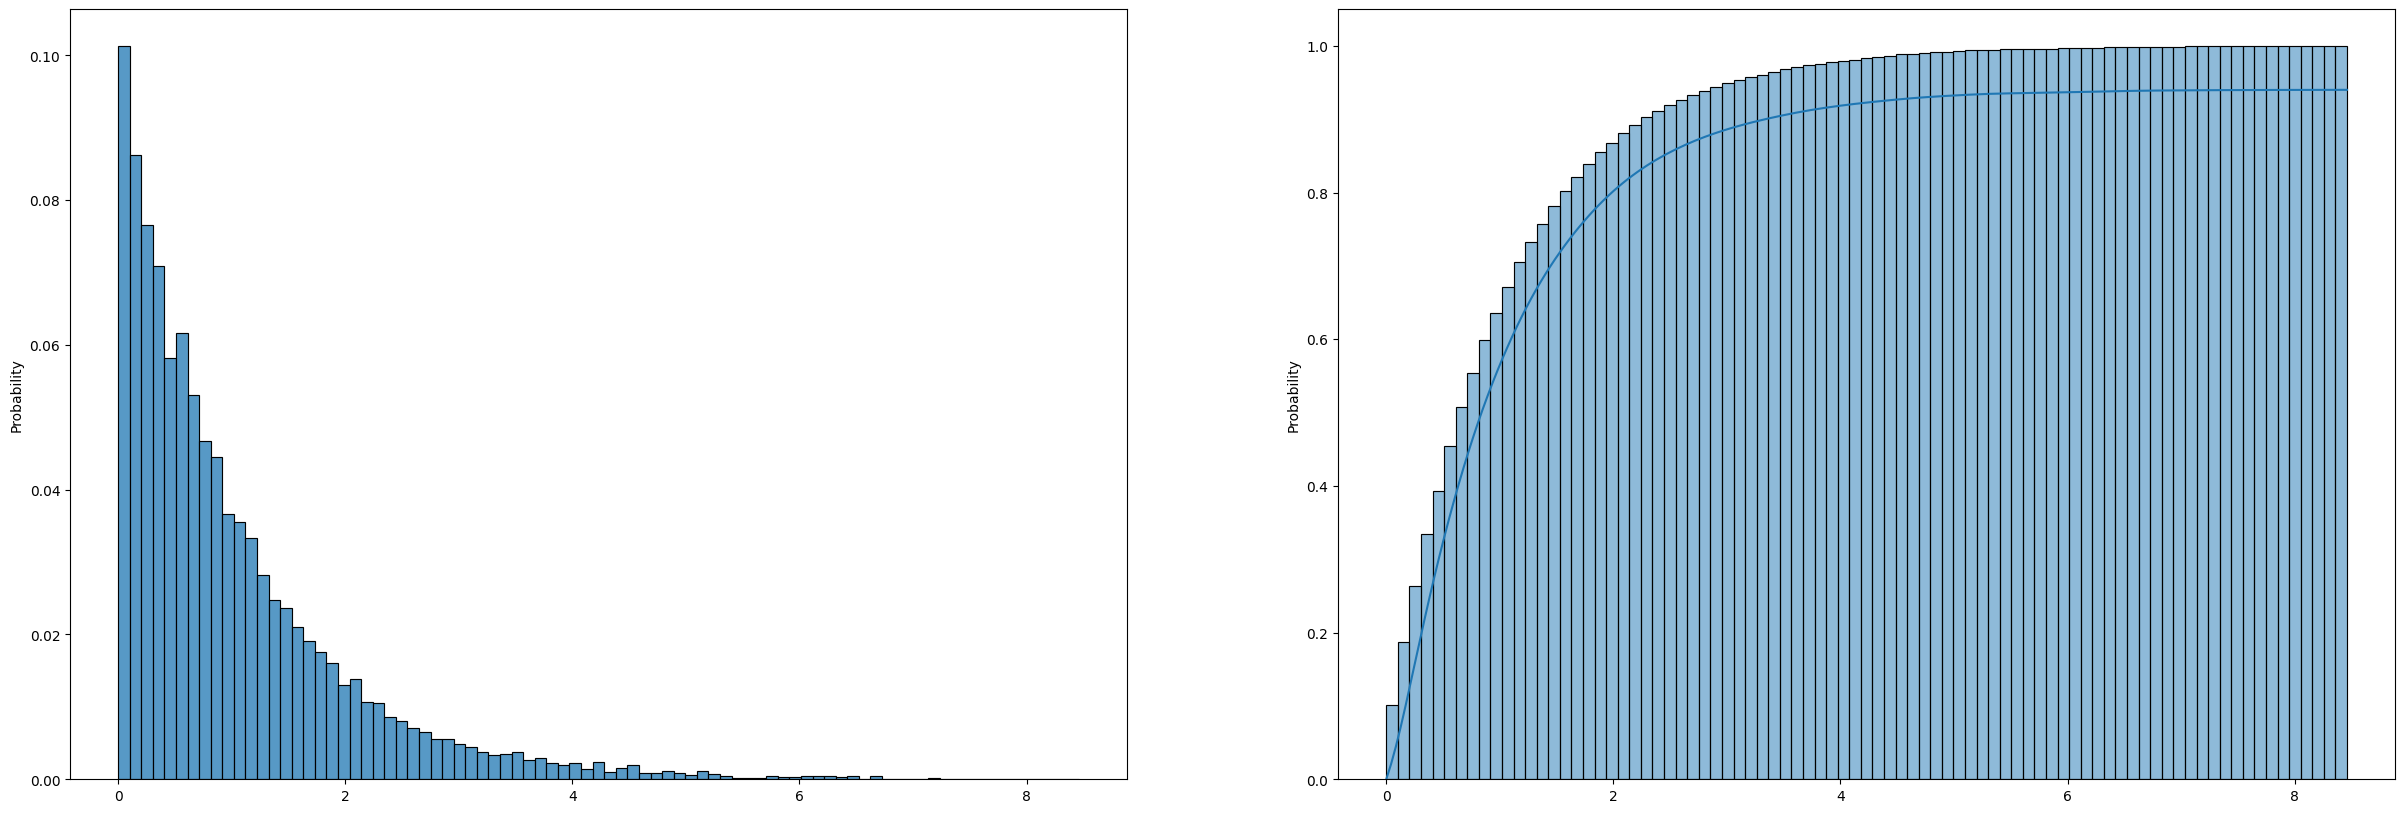

In [15]:
def rnexp(beta):
    u = rnd.random()
    return (-beta) * log(u)

beta = 1
exp_series = np.array([rnexp(beta) for _ in range(10000)])
df = pd.DataFrame(index=['@M@', '@D@'])
df['rnexp'] = [exp_series.mean(), exp_series.var()]
df['Теор. знач'] = [beta, beta**2]
df['Погрешность'] = df['rnexp'] - df['Теор. знач']
display(df)
fig, ax = plt.subplots(1, 2, figsize=(30, 10))
sns.histplot(exp_series, ax=ax[0], stat="probability")
sns.histplot(exp_series, ax=ax[1], kde=True, stat="probability", cumulative=True)

## 2.4 Хи-квадрат распределение

rnchis  Теор. знач  Погрешность
@M@   9.999077          10    -0.000923
@D@  20.026829          20     0.026829

<Axes: ylabel='Probability'>

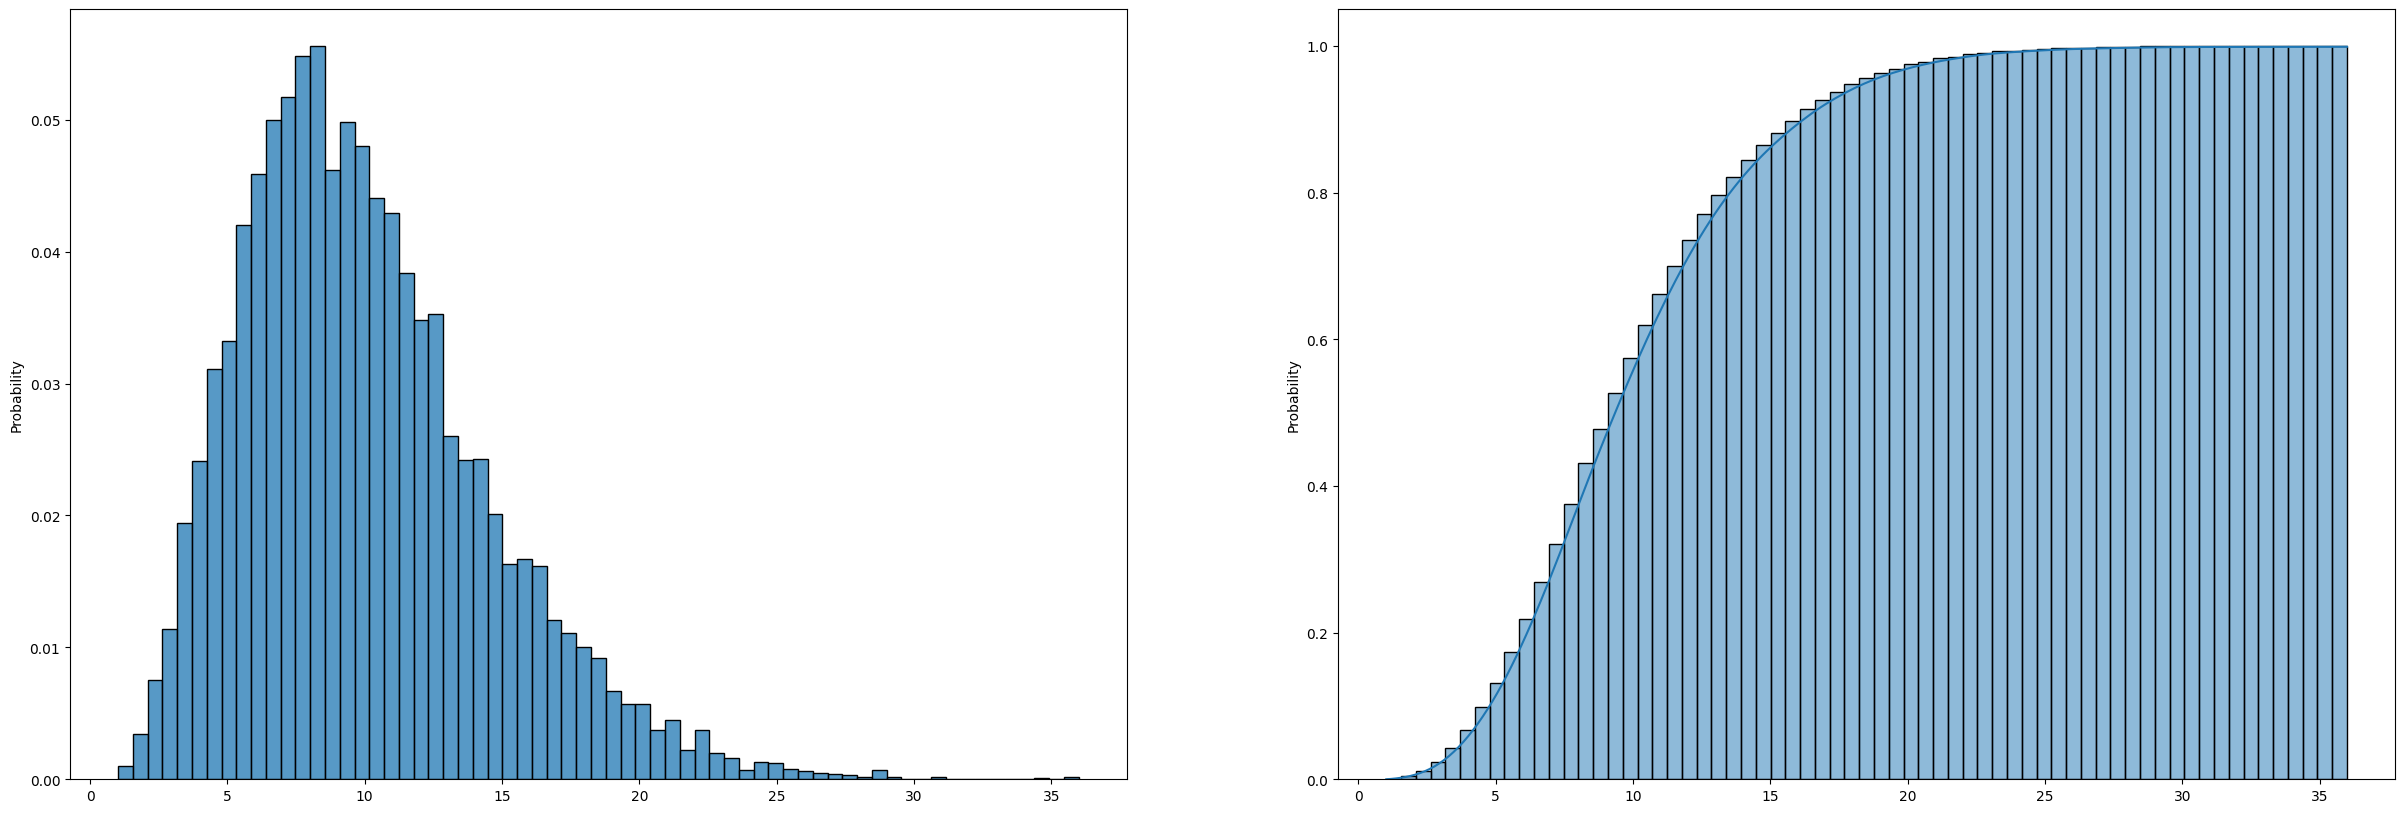

In [28]:
def rnchis(n):
    z_sqr = [rnrm1()**2 for _ in range(n)]
    return sum(z_sqr)

n = 10
chi_sqr_series = np.array([rnchis(n) for _ in range(10000)])
df = pd.DataFrame(index=['@M@', '@D@'])
df['rnchis'] = [chi_sqr_series.mean(), chi_sqr_series.var()]
df['Теор. знач'] = [n, n*2]
df['Погрешность'] = df['rnchis'] - df['Теор. знач']
display(df)
fig, ax = plt.subplots(1, 2, figsize=(30, 10))
sns.histplot(chi_sqr_series, ax=ax[0], stat="probability")
sns.histplot(chi_sqr_series, ax=ax[1], kde=True, stat="probability", cumulative=True)

## 2.5 Распределение Стьюдента

In [32]:
def rnstud(n):
    return rnrm1() / sqrt(rnchis(n) / n)

n = 10
stud_series = np.array([rnstud(n) for _ in range(10000)])
df = pd.DataFrame(index=['@M@', '@D@'])
df['rnstud'] = [stud_series.mean(), stud_series.var()]
df['Теор. знач'] = [0, 1.25]
df['Погрешность'] = df['rnstud'] - df['Теор. знач']
display(df)
fig, ax = plt.subplots(1, 2, figsize=(30, 10))
sns.histplot(stud_series, ax=ax[0], stat="probability")
sns.histplot(stud_series, ax=ax[1], kde=True, stat="probability", cumulative=True)

rnstud  Теор. знач  Погрешность
@M@ -0.005925        0.00    -0.005925
@D@  1.269581        1.25     0.019581

<Axes: ylabel='Probability'>

# Инд. задание

x_mean = 2.9856782604621777


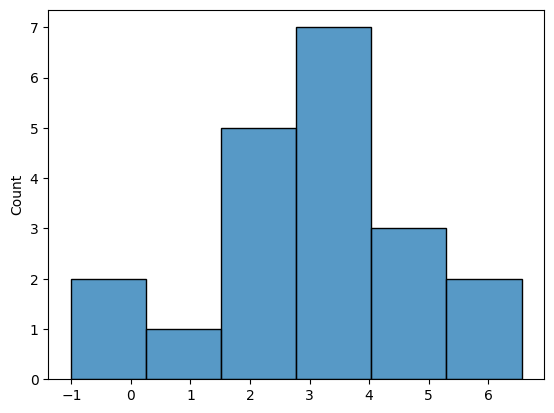

In [112]:
a = np.random.normal(3, 2, 20)
sns.histplot(a)
print(f'x_mean = {a.mean()}')